# Computed Tomography

## The physics of X-rays
X-rays are a form of electromagnetic radiation with higher energy and therefore shorter wavelength compared to visible or ultra-violet light. They were first described systematically by Wilhelm Röntgen in 1895. As their true nature was unclear to Röntgen at the beginning, he called them *X-radiation* referring to the letter X often used for the unknown in mathematical formulas. X-rays are produced whenever charged particles, typically electrons, hit a material with a sufficient kinetic energy. This can either happen if the electrons stimulate  characteristic X-ray emission or if they are scattered and slowed down by the strong electric field near nuclei with a high proton number (a radiation still refereed to by the German name *Bremsstrahlung*). If X-rays transverse through material, they interact with it in three main ways:

* **Photoelectric absorption:** occurs if the incoming X-ray photon is absorbed by an atom of the material it hits. In this process, it transfers all its energy to one of the atom's electrons. This typically allows the electron to leave the atom as a free (negative) charge carrier and leaves the positively charged atom behind.

* **Compton scattering:** refers to the inelastic scattering of the X-ray photon by an electron of the outer atom shell. In this process, part of the energy of the X-ray photon is transferred to the electron, again allowing it to leave the atom. Due to momentum and energy conservation, the X-ray photon changes its direction and has a longer wavelength.

* **Rayleigh scattering:** refers to an elastic scattering of the X-ray photon, i.e., without loosing energy.

Depending on the energy spectrum of the X-rays and the material, these different processes contribute in different proportions to the overall interaction. As X-rays are ionizing radiation, their administration to biological tissue is harmful and needs to be well justified. An overview of where X-rays fit in the EM spectrum is shown in {numref}`spectrum` Shortly after their discovery, images obtained by placing a target between an X-ray source and a photon detector such as shown Figure {numref}`xhand` were used for medical diagnosis and *projectional radiography* is still one of the most routinely applied examinations.

```{figure} images/tomography/EM_Spectrum3-new.jpg
---
height: 150px
name: spectrum
---
Overview of the electromagnetic spectrum.
```
```{figure} images/tomography/hand.jpg
---
height: 150px
name: xhand
---
X-ray photograph of the hand of Röntgen's wife.
```

## The mathematics of X-rays

Now we will describe the attenuation of the intensity of a monochromatic ray of photons traveling through a material by the above processes mathematically. For this, we first assume that the photons are emitted at $x=0$ with intensity $I_0$ and detected at $x = + \infty$ and ignore the $y$ and $z$ coordinate. The Beer-Lambert law states that the attenuation in a small interval of length $\delta x$ is proportional to the intensity $I(x)$ of the ray, the attenuation coefficient $u(x)$ (which summarizes the probabilities for the physical processes mentioned above) in this interval and its length. This can be expressed a

$$
 I(x + \delta x) = I(x) - u(x) I(x) \delta x \qquad \Longleftrightarrow \qquad \frac{I(x + \delta x) - I(x)}{\delta x} = - u(x) I(x)
$$

In the limit $\delta x \rightarrow 0$, the expression on the right gives the ordinary differential equation (ODE)

$$
\frac{d}{dx} I = - u I, \qquad I(0) = I_0 \quad,
$$

which is solved by
 
$$
I(x) = I_0 \exp \left( - \int_0^x u(x') dx' \right) \qquad ,
$$

If we now assume that the X-rays travel along an arbitrary ray $\ell$ connecting source and sensor element, call the measured intensity $I_1$ and rearrange the above terms we can write

```{math}
:label: lineInt
P_\ell = - \log \left(\frac{I_1}{I_0} \right) =  \int_\ell u(x) dx \quad .
```

So we see that in this formulation, we measure an integral of the unknown attenuation coefficient $u(x)$ along a line $\ell$ for each source-sensor pair.

```{figure} images/tomography/CT-Illustration.png
---
height: 150px
name: radon
---
Left: sketch of the auxiliary variables used to describe the two dimensional Radon transform. Right: Sketch of $R_\theta u(t)$, the projection of a function $u(x_1,x_2)$ onto a detector at angle $\theta$
```

## Computed tomography

In projectional radiography, only a particular two dimensional projection of a three dimensional object $u(x), x \in \mathbb{R}^3$ is obtained, namely its average X-ray attenuation along the projection rays. While this can reveal useful information about the interior properties of an object if patient, source and detector are arranged in a suitable way, it falls short of a complete reconstruction of $u$. The idea of computed tomography (CT) is to achieve this by combing projections from different directions by a computational algorithm. We start with the mathematical description of CT in two spatial dimensions, i.e., $x = [x_y, x_2]^T$. Let's assume that the support of $u(x_1,x_2)$ is constrained to the unit sphere, $\{x_1^2 + x_2^2 \leqslant 1 \}$ and that we place a flat detector along the tangent of the unit sphere whose angle to the positive $x_1$-axis is given by $\theta \in [0, \pi)$ (cf. {numref}`radon`). Both the point of contact of this detection line with the unit sphere and its normal in this point are given as $n = (\cos(\theta - \frac{\pi}{2}), \sin(\theta - \frac{\pi}{2})) = (\sin(\theta), -\cos(\theta))$, while $v = (\cos(\theta), \sin(\theta))$ is a unit vector along the tangent (such that for $\theta = 0$, it points into positive x direction). Now, any point on the detector line can be described as $n + t v$, i.e., parameterized by $t \in \mathbb{R}$. A line $\ell$ that is orthogonal to the detector and crosses it at the point corresponding to $t \in [-1,1]$ can be parameterized by $s \in \mathbb{R}$ as

$$
\begin{bmatrix}
x_1(s) \\
x_2(s)
\end{bmatrix}
 = s n + t v = s
\begin{bmatrix}
\sin(\theta) \\
-\cos(\theta)
\end{bmatrix} + t
 \begin{bmatrix}
\cos(\theta) \\
\sin(\theta)
\end{bmatrix}
$$

We can now eliminate $s$ by solving the equation for $x_2(s)$ for $s$ and inserting this expression into the equation for $x_1(s)$ to obtain a handy implicit equation for all points lying on $\ell$:

```{math}
:label: LinePara
\ell(\theta, t) = \{x \in \mathbb{R} \, | \, x_1 \cos(\theta) + x_2 \sin(\theta) = t\} \quad, 
```

where we stressed that $\ell$ is function of $\theta \in [0, \pi)$ and $t \in [-1,1]$. In fact, all lines crossing the unit sphere can be parameterized in this way and inserting this parameterization into {eq}`lineInt` yields a linear mapping $R$ from $u(x_1,x_2)$ to a function $f(\theta, t)$:

$$
f(\theta, t) = R u(\theta, t) := \int_{\ell(\theta, t)} u(x) dx \quad .
$$

This transform describes all possible X-ray measurements of $u(x)$ and is called the *Radon transform* after the Austrian mathematician Johann Radon (1887-1956). Although Radon examined the problem from a purely mathematical perspective, namely as a problem of *integral geometry*, his work lay the mathematical foundations of CT. To get an intuition of how $R u (\theta, t)$ looks like, consider $u = \delta_{(a, b)}$, i.e., a delta function located at $x_1 = a, x_2 = b$. If we call $R_\theta u(t) := R u (\theta, t)$, i.e., the measurement on the detector for a fixed angle $\theta$, $R_\theta u (t)$ will only be zero except for $t = a \cos(\theta) + b \sin(\theta)$ (cf. {eq}`LinePara`), where it is one. That means that $R u (\theta, t)$ is an indicator function on the set $\{(\theta, t) \, | \, t = a \cos(\theta) + b \sin(\theta)\}$, i.e., on a set where $t$ can be described by the linear combination of a sine and a cosine function of $\theta$. Therefore $f(\theta, t)$ typically looks like a superposition of sine and cosine waves and is therefore called *sinogram*. Some examples of functions and their sinograms are shown below.

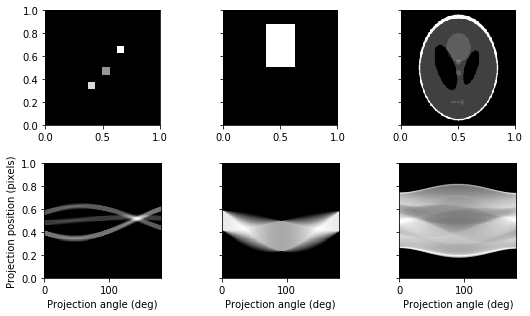

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

theta = np.linspace(0., 180., 160, endpoint=False)

image1 = np.zeros((160,160))
image1[80:90,80:90] = 1
image1[50:60,100:110] = 2
image1[100:110,60:70] = 1.5

image2 = np.zeros((160,160))
image2[20:80,60:100] = 1

image3 = rescale(shepp_logan_phantom(), scale=0.4, mode='reflect', multichannel=False)

sinogram1 = radon(image1, theta=theta, circle = False)
sinogram2 = radon(image2, theta=theta, circle = False)
sinogram3 = radon(image3, theta=theta, circle = False)

fig, ax = plt.subplots(2, 3, figsize=(8, 4.5), sharey=True)

ax[0,0].imshow(image1, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

ax[0,1].imshow(image2, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

ax[0,2].imshow(image3, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

ax[1,0].imshow(sinogram1, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, 1), aspect=1.1*160)
ax[1,0].set_xlabel("Projection angle (deg)")
ax[1,0].set_ylabel("Projection position (pixels)")

ax[1,1].imshow(sinogram2, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, 1), aspect=1.1*160)
ax[1,1].set_xlabel("Projection angle (deg)")

ax[1,2].imshow(sinogram3, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, 1), aspect=1.1*160)
ax[1,2].set_xlabel("Projection angle (deg)")

fig.tight_layout()
plt.show()

Now that we can describe all possible X-ray measurements $f(\theta, t)$ of an image $u(x_1,x_2)$  via the Radon transform $R$, the interesting question is whether we can also recover $u$ from $f$, i.e., whether $R$ is invertible. This question is answered by the *Fourier slice theorem*, which relates the one dimensional Fourier transforms of $R_\theta u (t)$ to the two dimensional Fourier transform of $u$:

````{admonition} Fourier Slice Theorem
The one-dimensional Fourier transform of $f(\theta,\cdot) = R_{\theta} u$ is related to the two-dimensional Fourier transform of $u$ as
```{math}
:label: FourierSliceTheo
\widehat{f}(\theta,\omega) =  \widehat{u}(\omega v),
```
with $v = [\cos \theta, \sin \theta]^T$.

This implies that the projection data for a particular angle $\theta$ fully determines the radial slice of the Fourier transform of $u$ with the same angle. Thereby, the complete Fourier transform of $u$ can be computed from $f(\theta, t)$ and as the Fourier transform is invertible, we can recover $u$ from $f$. 
````

```{admonition} Proof of the Fourier Slice Theorem
:class: dropdown

The proof of the Fourier slice theorem is short and instructive. First, we write out the rhs of {eq}`FourierSliceTheo`:

$$
\widehat{R_\theta u}(\omega) = \int_{-\infty}^{\infty} R_\theta[u] (t) e^{- 2 \pi i \omega t} dt = \int_{-\infty}^{\infty} \int_{\ell(\theta, t)} u(x_1,x_2) dx \;\, e^{- 2 \pi i \omega t} dt
$$

Then, we use the description of $\ell(\theta, t)$, {eq}`LinePara`, to substitute $t = x_1 \cos \theta + x_2 \sin \theta$:

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} u(x_1,x_2) e^{- 2 \pi i \omega (x_1 \cos \theta + x_2 \sin \theta)} dx_1 dx_2 \\
:=
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} u(x_1,x_2) e^{- 2 \pi i (x_1 k_1 + x_2 k_2)} dx_1 dx_2 = \hat{u}(k),
$$

where we defined $k = [k_1, k_2]^T := \omega v = [\omega \cos \theta, \omega \sin \theta]^T$.
```

The Fourier slice theorem suggests a simple strategy to invert the Radon transform: First, we compute the one dimensional Fourier transform of each angular projection $R_\theta[u]$ and arrange them in two dimensional Fourier space to obtain the  Fourier transform of $u$ and then we compute the inverse Fourier transform to obtain $u$ itself. The main problem with this strategy is that in practice, the amount of measurements is finite. If we assume that we sample $R_\theta[u](t)$ on a regular $t$-grid, we also sample the radial slice $\hat{u}(\omega v)$ on a regular $\omega$-grid. Due to the radial arrangement of the slices, we sample $\hat{u}$ on circles and not on a regular grid, which would be required to use efficient inverse Fourier transform algorithms such as the *fast Fourier transform* (*FFT*). As illustrated in {numref}`FourierSampling`, this means that the density of the frequency samples decreases towards the high frequencies, which contain information about the small scale image features.

```{figure} images/tomography/FourierSliceTheorem.png
---
height: 150px
name: FourierSampling
---
Sampling in Fourier space: The Fourier slice theorem {eq}`FourierSliceTheo` states that every angular projection $R_\theta[u](t)$ contains the full information about $\hat{u}(k_1,k_2)$ along one radial slice (red lines). A finite, regular sampling of $t$ translates into a finite, regular sampling along these lines (blue dots). It becomes apparent that lower frequencies ($\sqrt{k_1^2 + k_2^2}$ small) are sampled more densely than high frequencies.
```

Nonetheless, the Fourier slice theorem is the basis the most widely used CT reconstruction technique, the *filtered backprojection* (*FBP*). As the name suggests, FBP consists of two steps, a filtering step and a back projection step. We start with the back projection, which is a simple operation to map a sinogram $f(\theta, t)$ back into the image space: For every angle $\theta$, we smear the one dimensional function $f_\theta(t) := f(\theta, t)$ (which corresponds to the projection $R_\theta[u]$) over the image by adding the value $f_\theta(t)$ to each point on the ray $\ell(\theta, t)$, namely to all $(x_1, x_2)$ that satisfy $t = x_1 \cos \theta + x_2 \sin \theta$:

```{math}
:label: BP
u_{BP}(x_1, x_2) = \int_0^\pi f(\theta, x_1 \cos \theta + x_2 \sin \theta) d\theta.
```

It turns out that the backprojection operator is the adjoint $R^*$ of the Radon transform. Unfortunately, it is not the inverse $R^{-1}$. Rather, one can show that

$$
R^* R u (x) = \int \frac{u(x)}{\| x -y \|} dy = \frac{1}{\| x \|} \ast u(x),
$$

i.e., it only recovers $u(x)$ convoluted with a smoothing kernel, as will be illustrated below. The reason for this is the non-uniform sampling of $\hat{u}(k)$, the Fourier transform of $u(x)$ (cf. {numref}`FourierSampling`): In proportion, too many low frequencies are projected back, and low frequencies represent the smooth features of the image. A reasonable idea to improve upon this result is therefore to introduce weights that counter-act this imbalance in favor of the high-frequencies before the backprojecting step. This corresponds to a *high-pass filtering* of the sinogram data $f(\theta, t)$ in $t$-direction, i.e., we convolute it with a suitable filter function $h(t)$. It turns out that the correct filter we need is a *ramp*-filter, whose Fouriertransform is given by $\hat{h}(\omega) = | \omega |$. Taken together, the filtered sinogram $q$ is given as

$$
q(\theta, t) := H \left[f \right](\theta, t) := F_t^{-1}\left(\hat{h}(\omega) \cdot  F_t \left[f_\theta \right)(\omega) \right](t).
$$

Below, we illustrate that if the filtered sinogram is now inserted into the backprojection {eq}`BP`, we converge to the true solution if the number of angles increases, and one can indeed show that $R^* H R = I$.

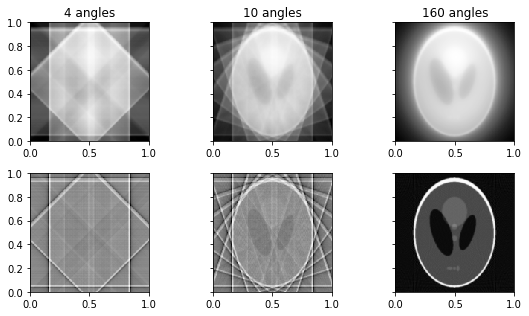

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon

theta1 = np.linspace(0., 180., 4, endpoint=False)
theta2 = np.linspace(0., 180., 10, endpoint=False)
theta3 = np.linspace(0., 180., 160, endpoint=False)

image = rescale(shepp_logan_phantom(), scale=0.4, mode='reflect', multichannel=False)

sinogram1 = radon(image, theta=theta1, circle = False)
sinogram2 = radon(image, theta=theta2, circle = False)
sinogram3 = radon(image, theta=theta3, circle = False)

BP1 = iradon(sinogram1, theta=theta1, filter=None, circle = False)
BP2 = iradon(sinogram2, theta=theta2, filter=None, circle = False)
BP3 = iradon(sinogram3, theta=theta3, filter=None, circle = False)

FBP1 = iradon(sinogram1, theta=theta1, filter='ramp', circle = False)
FBP2 = iradon(sinogram2, theta=theta2, filter='ramp', circle = False)
FBP3 = iradon(sinogram3, theta=theta3, filter='ramp', circle = False)

fig, ax = plt.subplots(2, 3, figsize=(8, 4.5), sharey=True)

ax[0,0].imshow(BP1, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))
ax[0,0].set_title('4 angles')

ax[0,1].imshow(BP2, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))
ax[0,1].set_title('10 angles')

ax[0,2].imshow(BP3, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))
ax[0,2].set_title('160 angles')

ax[1,0].imshow(FBP1, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

ax[1,1].imshow(FBP2, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

ax[1,2].imshow(FBP3, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))

fig.tight_layout()
plt.show()

Up to now, both the function $u(x_1,x_2)$ and its sinogram $f(\theta, t)$ where functions of two variables and we saw that this was enough to reconstruct $u$ from $f$. In three spatial dimensions, we need four variables to parameterize all lines going through the unit sphere (two for the orientation and two for the spatial offset), but we do not need to measure all the corresponding line integrals. From the 2D results, we know that all directions lying in a plane are sufficient to fully determine the function in that plane. This is the idea behind the classical CT scanning strategy: The patient is lying on a bed that is traversed through the scanner step-by-step and all projections in a plane orthogonal to this direction are acquired, cf. {numref}`ModernCT`. Then, the whole three dimensional attenuation map can be reconstructed slice-by-slice, which also explains the word *tomography*, which is derived from the ancient Greek *tomos*, which means *slice* or *section*.

## Exercises

### FBP

One implementation of the Radon transform and the FBP can be found in the [`scikit-image` toolbox](http://scikit-image.org/). An example of how to load a simple image, compute its Radon transform to simulate sinogram data and how to run a FBP to obtain a reconstruction from this data is shown below. 

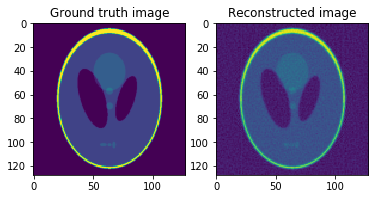

In [21]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import radon,iradon,resize
from skimage.util import random_noise

# settings
n = 128
theta = np.linspace(0., 180.,n, endpoint=False)
sigma = 1e-1

# ground truth image
image = resize(data.shepp_logan_phantom(),(n,n))

# transform and add noise
sinogram = radon(image, theta=theta, circle = False)
sinogram_noisy = random_noise(sinogram,mode='gaussian',var=sigma,clip=False)

# reconstruction, type help(iradon) for more options regarding the filter
image_reconstructed = iradon(sinogram_noisy, theta=theta, filter='ramp', circle = False)

# plot
fig, ax = plt.subplots(1,2)

ax[0].imshow(image)
ax[0].set_title('Ground truth image')

ax[1].imshow(image_reconstructed)
ax[1].set_title('Reconstructed image')

plt.show()

* Now we examine what happens if we add noise to the sinogram data. Let $f = K u$ be the clean sinogram data arranged as a $m \times 1$ vector and generate noisy data by setting $f^\delta = f + \sigma \varepsilon$, where $\varepsilon$ is a $m\times 1$ vector of standard normal distributed random variables and $\sigma$ determines the noise level. Examine how the FBP reacts to different noise levels and how changing the frequency filter affects the results.  

* In many applications, the range of available projection angles is restricted $\theta \in [\theta_{min}, \theta_{max}]$, $\theta_{min} > 0$, $\theta_{max} < \pi$ or the angular resolution is very coarse. Examine the effects of these restrictions on FBP reconstructions. In limited angle tomography, which parts of the image are lost? 